# Student Number: 18011228
## Student name: Paul Jabani Lassa
### Module: Machine Learning and Predictive analytics


In [1]:
#!pip install keras
#!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm 
from sklearn.svm import SVC


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


# Heart Failure Prediction 

#### Project Description:

Cardiovascular diseases (CVDs) are the leading cause of death worldwide, killing an estimated 17.9 million people each year, accounting for 31% of all deaths. This dataset contains 12 variables that can be used to predict heart failure mortality.Most cardiovascular illnesses can be avoided by mitigating behavioural risk factors such cigarette use, poor diet and obesity, physical inactivity, and problematic alcohol consumption.People with cardiovascular disease or who are at high cardiovascular risk as a result of the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease, would benefit from early detection and management. the development of a machine learning model to accurately predict this would be of great benefit.

This project will create models to predict potential heart failure on the basis of certain input features. all models created will be evaluated see their level of accuracy and identify the best model. 


### Dataset:   https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv

# Load Dataset

In [2]:
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


# Data Exploration

In [3]:
# list all columns in the dataset 
heart_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### Get info of the different variables in the dataset

In [4]:
# get info of the different variables in the dataset
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Checking for any missing values across the datasetet

In [5]:
# check if there any null values in dataset
heart_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Understanding values in the dataset

In [6]:
# Check Number of Unique Values in dataset
heart_df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

## Numerical data
##### age
##### creatinine_phosphokinase
##### ejection_fraction
##### platelets
##### serum_creatinine
##### serum_sodium
##### time
## Categorical data
##### Sex - Gender of patient Male = 1, Female =0
##### Diabetes - 0 = No, 1 = Yes
##### Anaemia - 0 = No, 1 = Yes
##### High_blood_pressure - 0 = No, 1 = Yes
##### Smoking - 0 = No, 1 = Yes
##### DEATH_EVENT - 0 = No, 1 = Yes
##### Exploratory Data Analysis (EDA)

## Doing Univariate Analysis for statistical description and understanding of dispersion of data

In [7]:
# get the statistical description of dataset
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


1. Features "creatinine_phosphokinase" & "serum creatinine" are significantly skewed.
2. All the other features almost shows the normal distribution, since mean is equal to their respective medians.

# Data Visualisation

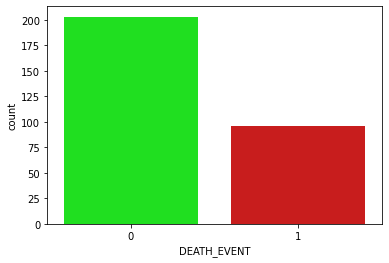

In [8]:
cols= ["#00ff00","#e50000"]
ax = sns.countplot(x= heart_df["DEATH_EVENT"], palette= cols)

The Target labels are 203 versus 96 indicating there is an imbalance in the data.

Male      194
Female    105
Name: sex, dtype: int64


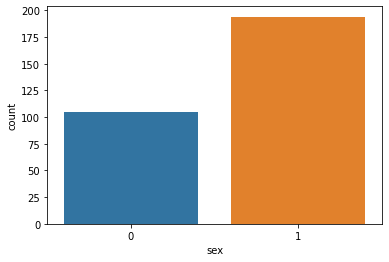

In [63]:
# Classifying 0 as Female and 1 as Male
classes = {0:'Female', 1:'Male'}
print(heart_df.sex.value_counts().rename(index = classes))

# showing distribution between genders
sns.countplot(heart_df.sex)
plt.show()

1. can see an imbalance between males and females within the dataset, this may indicate that more males are affected by cardiovasculatr disease

### Plot heatmap of correlation between columns Pearson's and Spearman's Correlation Coefficent 

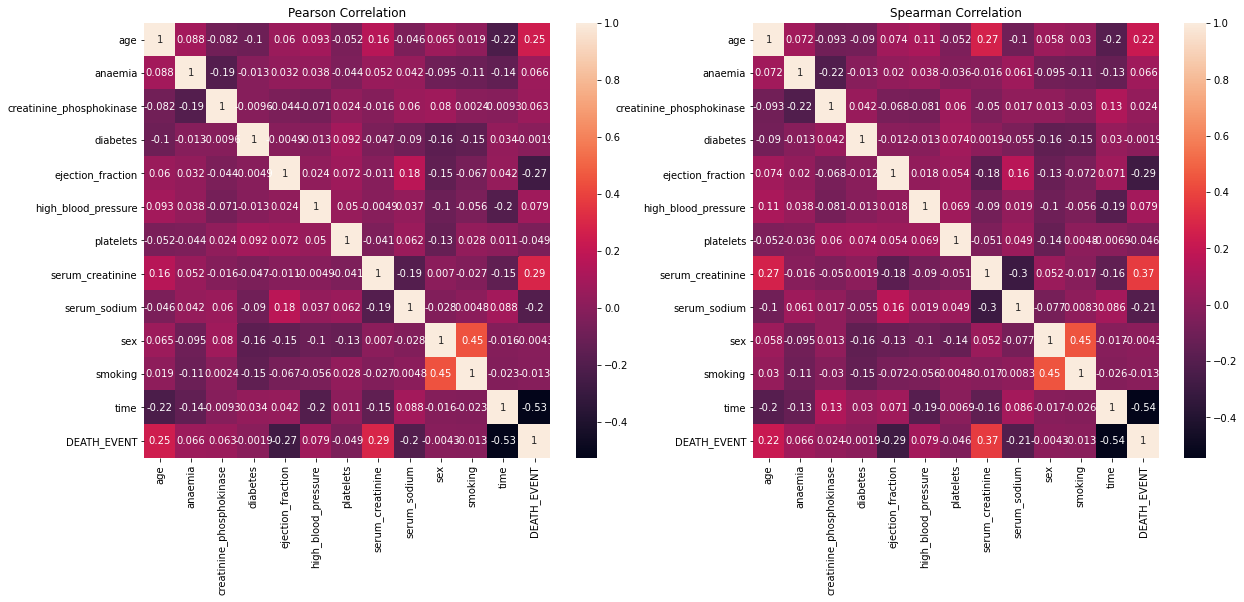

In [9]:
# Finding the correlation between different features
#Visualising the data with Pearson's and Spearman's Correlation Coefficent 

plt.figure(figsize=(20, 8)) 
plt.subplot(1, 2, 1)
corr = heart_df.corr(method = 'pearson')
sns.heatmap(corr, annot = True)
plt.title("Pearson Correlation")

plt.subplot(1, 2, 2)
corr = heart_df.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.title("Spearman Correlation")
plt.show()

1. "time" is the most important feature as it would've been very crucial to get diagnosed early with cardivascular issue so as to get timely treatment thus, reducing the chances of any fatality. (Evident from the inverse relationship)

2. "serum_creatinine" is the next important feature as serum's (essential component of blood) abundancy in blood makes it easier for heart to function.

3. "ejection_fraction" has also significant influence on target variable which is expected since it is basically the efficiency of the heart.

4. Can be seen from the inverse relation pattern that heart's functioning declines with ageing.

### Checking for potential outliers using the "Boxen and Swarm plots" of non binary features.

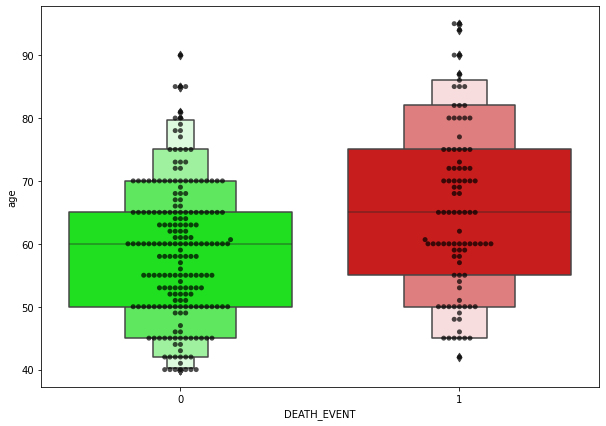

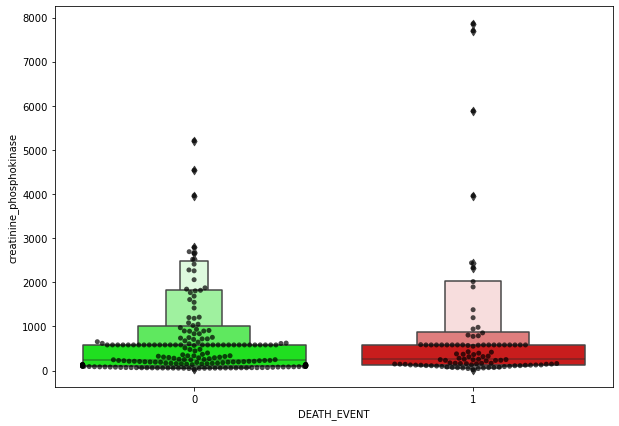

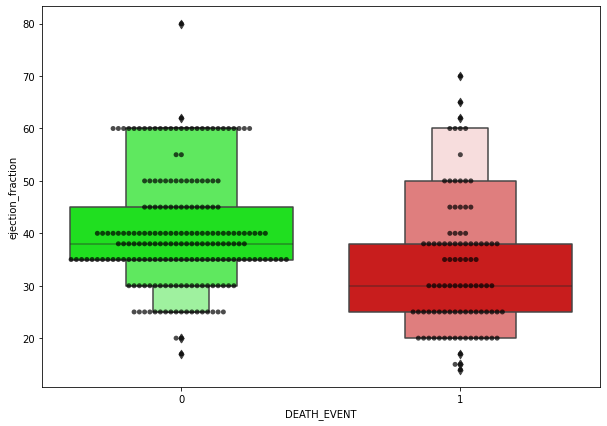

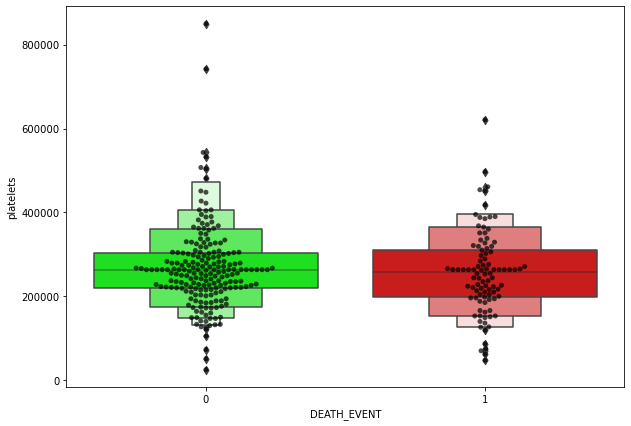

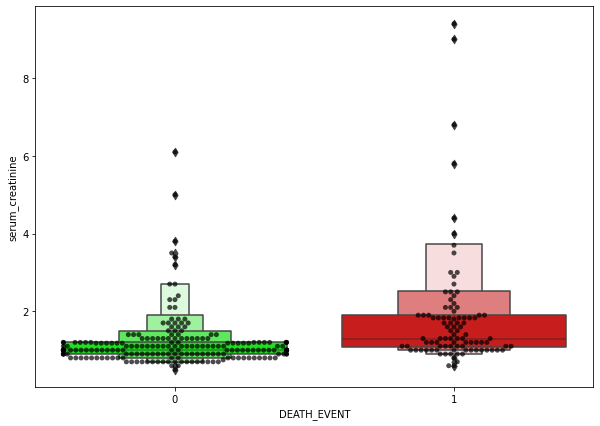

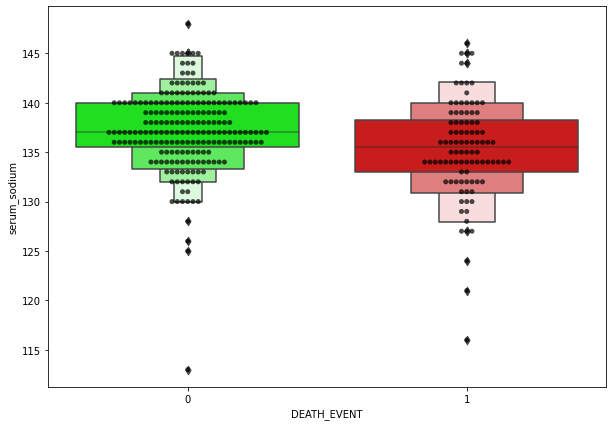

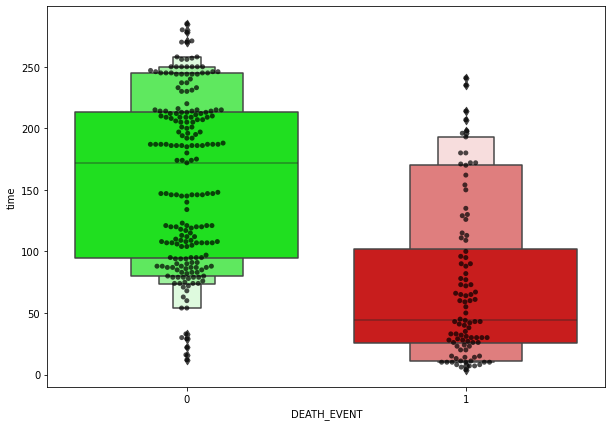

In [10]:
features = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium", "time"]
for i in features: 
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=heart_df["DEATH_EVENT"], y=heart_df[i], color="black", alpha=0.7)
    sns.boxenplot(x=heart_df["DEATH_EVENT"], y=heart_df[i], palette=cols)
    plt.show() 

1. Few Outliers can be seen in almost all the features

2. Extreme levels in variables might have actually led to a death event

3. Considering the size of the dataset and relevancy of it, we won't be dropping such outliers in data preprocessing which wouldn't bring any statistical fluke.


### Plotting Kernel Density Estimation of time and age features.

<AxesSubplot:xlabel='time', ylabel='age'>

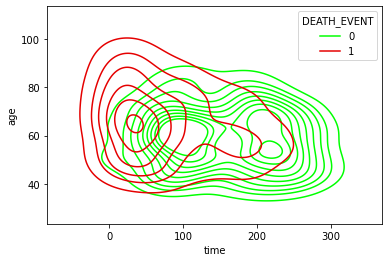

In [11]:
sns.kdeplot(x=heart_df["time"], y=heart_df["age"], hue =heart_df["DEATH_EVENT"], palette=cols)

# Data preprocessing 

In [12]:
# defining dependent(DEATH_EVENT) and independent variables
X=heart_df.drop(["DEATH_EVENT"],axis=1)
y=heart_df["DEATH_EVENT"]

In [13]:
# using the standard scaler for the features and analyzing 
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


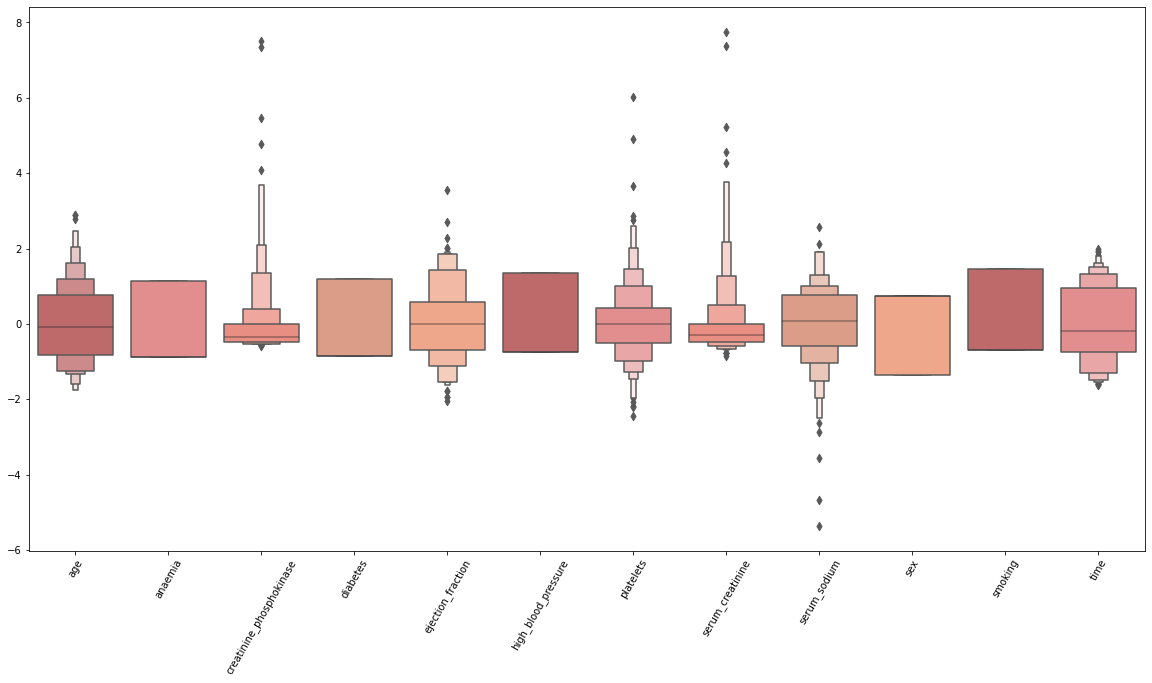

In [14]:
# 

colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

# Splitting variables into training and testing datasets

In [15]:
X_train, X_test, Y_train,Y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=25)

## Building Model

### 1. SUPPORT VECTOR MACHINE (SVM)

In [72]:
# Instantiating the SVM algorithm  

model1=svm.SVC()

# Fitting the model
model1.fit (X_train, Y_train)

# Predicting the test variables
y_pred = model1.predict(X_test)

# Getting the score
svm_score = model1.score(X_test, Y_test)

actual_score = model1.score(X_test, Y_test)*100

actual_score

78.88888888888889

In [17]:
#Printing classification report (since there was biasness in target labels)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84        60
           1       0.69      0.67      0.68        30

    accuracy                           0.79        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.79      0.79      0.79        90



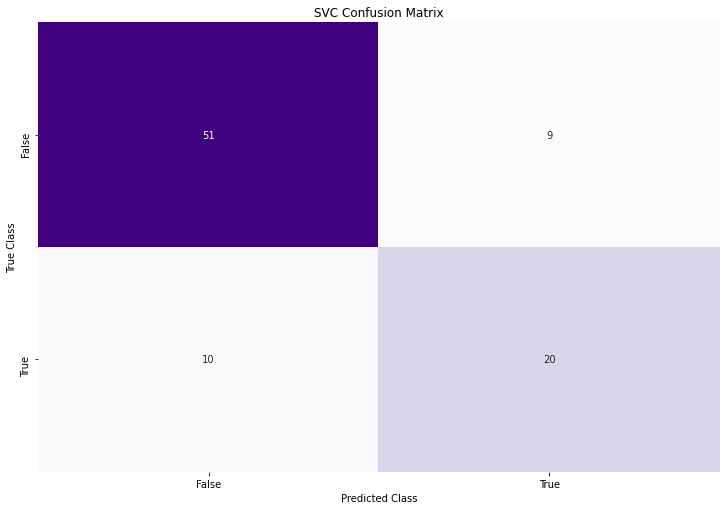

In [64]:
# plotting the confusion matrix

#Confusion Matrix
classes_names = ['False', 'True']
svc_cm = confusion_matrix(Y_test, y_pred)
plt.subplots(figsize=(10,7))
svc_ConfusionMatrix = pd.DataFrame(svc_cm, index=classes_names, columns=classes_names)

sns.heatmap(svc_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("SVC Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

## LOGISTIC REGRESSION

In [52]:
# Logistic Regression Model
lr = LogisticRegression(max_iter=200)

# Fitting the model
lr.fit(X_train, Y_train)

# Predicting the test variables
lr_y_pred = lr.predict(X_test)


# Getting score of the model
lr_accuracy = accuracy_score(Y_test, lr_y_pred)
print('Accuracy Score: ', lr_accuracy*100)



Accuracy Score:  84.44444444444444


In [53]:
print("Classification Report:-")
print(  classification_report(Y_test, lr_y_pred))

Classification Report:-
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        60
           1       0.77      0.77      0.77        30

    accuracy                           0.84        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.84      0.84      0.84        90



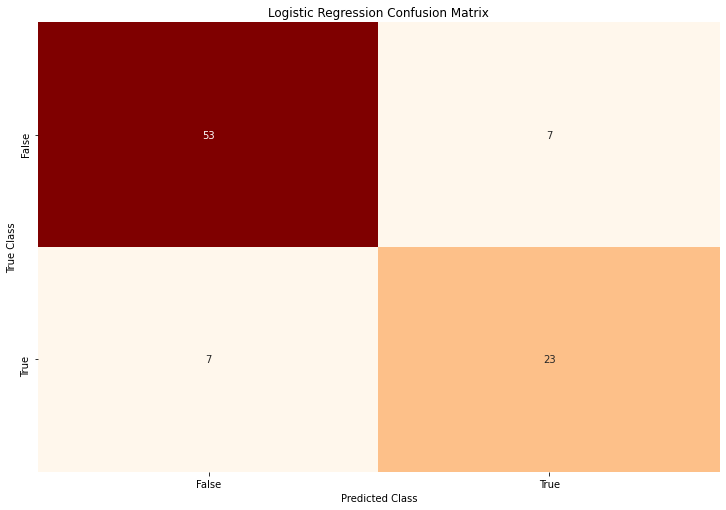

In [58]:
#Plotting the Confusion Matrix
lr_cm = confusion_matrix(Y_test, lr_y_pred)
plt.subplots(figsize=(10,7))
classes_names = ['False', 'True']
lr_ConfusionMatrix = pd.DataFrame(lr_cm, index=classes_names, columns=classes_names)

sns.heatmap(lr_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Logistic Regression Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


# 2. Decision Tree

In [30]:
#Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=33) 

# Fitting the model
dtree.fit(X_train, Y_train)

# Predicting the test variables
dtree_y_pred = dtree.predict(X_test)


# Getting the score
dtree_accuracy = accuracy_score(Y_test, dtree_y_pred)
print('Accuracy Score: ', dtree_accuracy*100)


Accuracy Score:  80.0


In [31]:
#Printing classification report (since there was biasness in target labels)
print("Classification Report:-")
print(  classification_report(Y_test, dtree_y_pred))

Classification Report:-
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        60
           1       0.71      0.67      0.69        30

    accuracy                           0.80        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.80      0.80      0.80        90



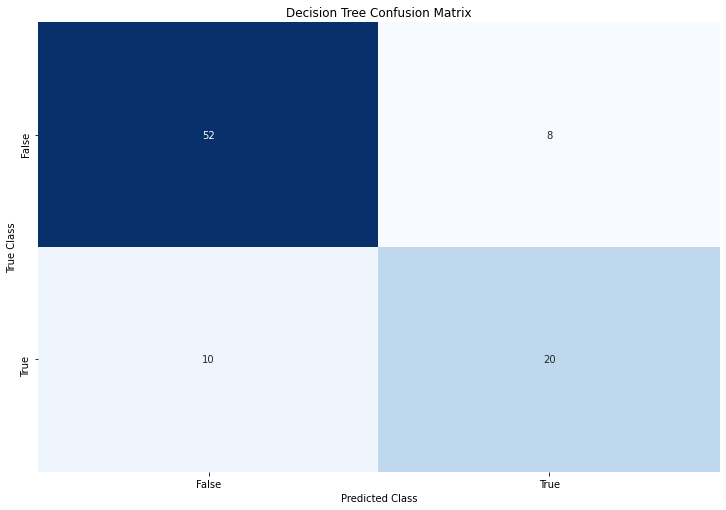

In [59]:
# plotting the confusion matrix
classes_names = ['False', 'True']
dtree_cm = confusion_matrix(Y_test, dtree_y_pred)
plt.subplots(figsize=(10,7))
dtree_ConfusionMatrix = pd.DataFrame(dtree_cm, index=classes_names, columns=classes_names)

sns.heatmap(dtree_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()


## 3. Random Forest

In [38]:
#Random Forest Model
rfc = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)

# Fitting the model
rfc.fit(X_train, Y_train)

# Predicting the test variables
rfc_y_pred = rfc.predict(X_test)

# Getting the score
rfc_accuracy = accuracy_score(Y_test, rfc_y_pred)
print('Accuracy Score: ', rfc_accuracy*100)



Accuracy Score:  83.33333333333334


In [39]:
print("Classification Report:-")
print(  classification_report(Y_test, rfc_y_pred))

Classification Report:-
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        60
           1       0.76      0.73      0.75        30

    accuracy                           0.83        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.83      0.83      0.83        90



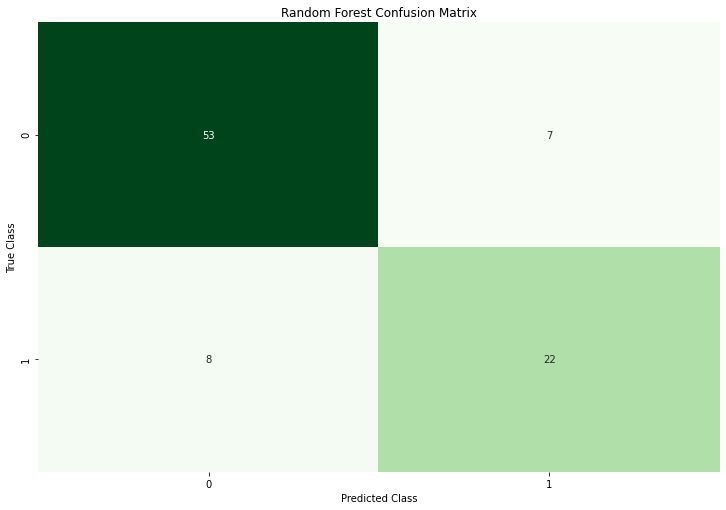

In [60]:

#Confusion Matrix
classes_names = ['False', 'True']
rfc_cm = confusion_matrix(Y_test, rfc_y_pred)
plt.subplots(figsize=(10,7))
rfc_ConfusionMatrix = pd.DataFrame(rfc_cm, index=classes_names, columns=classes_names)

sns.heatmap(rfc_cm, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()



## Naive Bayes

In [48]:
# Naive Bayes model
gnb = GaussianNB()

# fitting the model
gnb.fit(X_train, Y_train)

#predicting the test variables 
gnb_y_pred = gnb.predict(X_test)

# Score the model
gnb_accuracy = accuracy_score(Y_test, gnb_y_pred)
print('Accuracy Score: ', gnb_accuracy*100)



Accuracy Score:  74.44444444444444


In [49]:
print("Classification Report:-")
print(  classification_report(Y_test, gnb_y_pred))

Classification Report:-
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        60
           1       0.64      0.53      0.58        30

    accuracy                           0.74        90
   macro avg       0.71      0.69      0.70        90
weighted avg       0.74      0.74      0.74        90



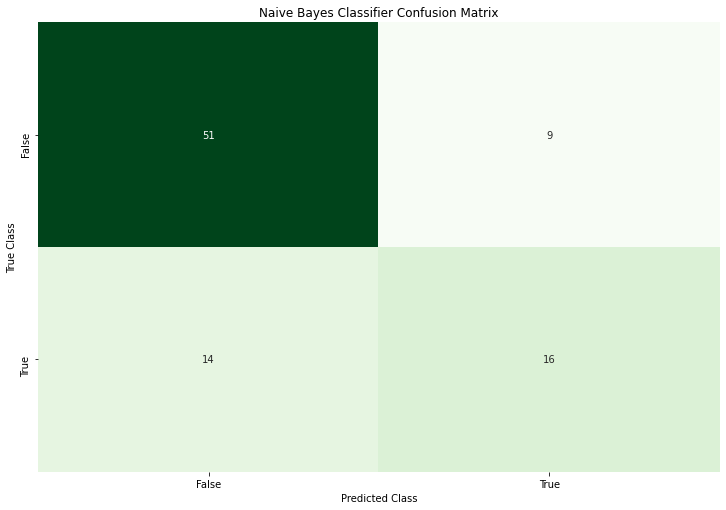

In [62]:
#Confusion Matrix
gnb_cm = confusion_matrix(Y_test, gnb_y_pred)
plt.subplots(figsize=(10,7))
gnb_ConfusionMatrix = pd.DataFrame(gnb_cm, index=classes_names, columns=classes_names)

sns.heatmap(gnb_ConfusionMatrix, annot=True, cbar=None, cmap="Greens", fmt = 'g')
plt.title("Naive Bayes Classifier Confusion Matrix") 
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

# Analysing all models 

In [73]:
models = pd.DataFrame({
    'Model': ['SUPPORT VECTOR MACHINE (SVM)','Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Accuracy Score': [svm_score, lr_accuracy, dtree_accuracy, rfc_accuracy, gnb_accuracy]})

models.sort_values(['Accuracy Score'], ascending=[False])

,Model,Accuracy Score
1,Logistic Regression,0.844444
3,Random Forest,0.833333
2,Decision Tree,0.800000
0,SUPPORT VECTOR MACHINE (SVM),0.788889
4,Naive Bayes,0.744444


### From the table above, it can be seen that the logistic regression model produced the highest predection accuracy of all the models with an 84.44% accuracy. for future develpmont other scaling methods like Robust scaling could be used to improbve the accuracy. Adifferent coading enviroment could also be used because testing an artificial neural nertworks cause the kernel to die this may be as a result of system configurations

# Artificial Neural Network (ANN)

## NURAL NETWORK ALWAYS CAUSING NOTEBOOK KERNEL TO DIE THEREFORE COULD NOT BE TESTED 

In [ ]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

In [1]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, Y_train, batch_size = 25, epochs = 80,callbacks=[early_stopping], validation_split=0.25)